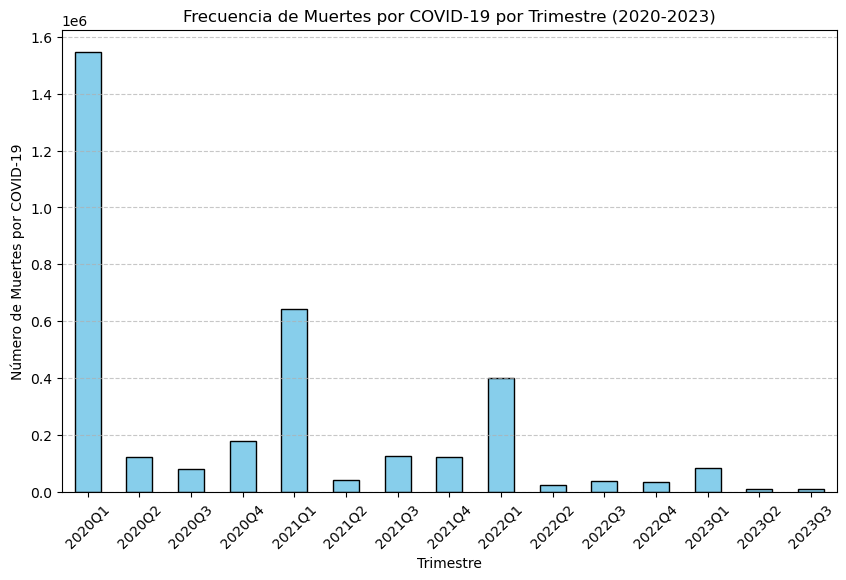

end


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("covid-19.csv")

df = df[df['Age Group'] == 'All Ages']

df = df[df['Sex'] == 'All Sexes']

df = df[df['State'] != 'United States']

START_DATE = 'Start Date'
END_DATE = 'End Date'

df[START_DATE] = pd.to_datetime(df[START_DATE])
df[END_DATE] = pd.to_datetime(df[END_DATE])

df['Quarter'] = pd.PeriodIndex(df[START_DATE], freq='Q')

deaths_by_quarter = df.groupby('Quarter')['COVID-19 Deaths'].sum()

plt.figure(figsize=(10, 6))
deaths_by_quarter.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Trimestre')
plt.ylabel('Número de Muertes por COVID-19')
plt.title('Frecuencia de Muertes por COVID-19 por Trimestre (2020-2023)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

print("end")

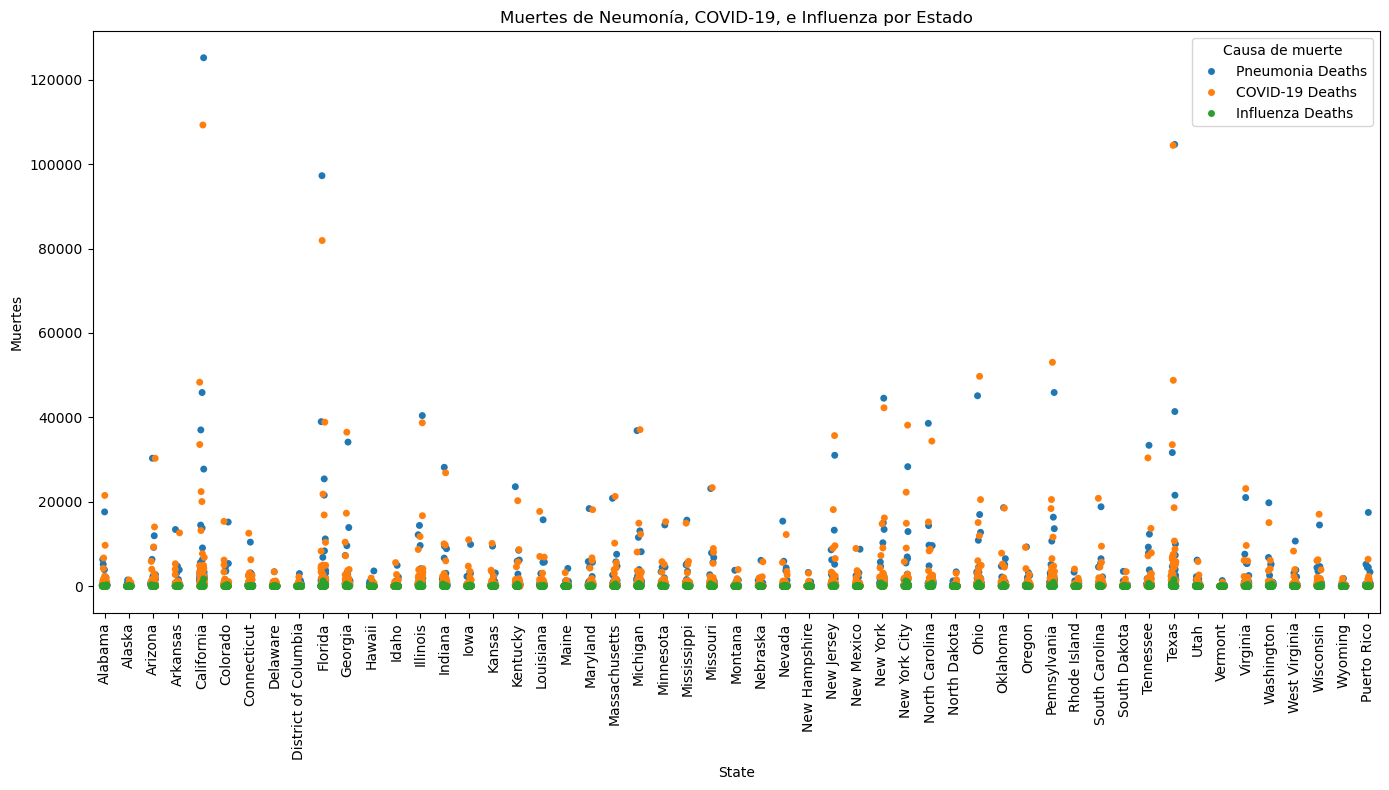

end


In [6]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_csv("covid-19.csv")

df = df[df['Age Group'] == 'All Ages']

df = df[df['Sex'] == 'All Sexes']

data = df[df['State'] != 'United States']

data_filtered = data[['State', 'Pneumonia Deaths', 'COVID-19 Deaths', 'Influenza Deaths']]

data_melted = data_filtered.melt(id_vars='State', var_name='Causa de Muerte', value_name='Muertes')

plt.figure(figsize=(14, 8))
sns.stripplot(x='State', y='Muertes', hue='Causa de Muerte', data=data_melted, jitter=True)

plt.title('Muertes de Neumonía, COVID-19, e Influenza por Estado')
plt.xticks(rotation=90)
plt.legend(title='Causa de muerte')
plt.tight_layout()

plt.show()

print("end")


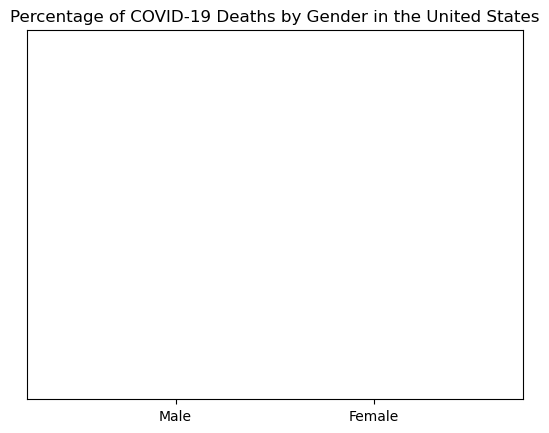

In [9]:
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('covid-19.csv')

# Filter data for United States
us_data = data[data['State'] == 'United States']

# Calculate the percentage of deaths by gender
total_deaths = us_data['COVID-19 Deaths'].sum()
male_deaths = us_data[us_data['Sex'] == 'male']['COVID-19 Deaths'].sum()
female_deaths = us_data[us_data['Sex'] == 'female']['COVID-19 Deaths'].sum()

male_percentage = (male_deaths / total_deaths) * 100
female_percentage = (female_deaths / total_deaths) * 100

# Create the isotype chart
fig, ax = plt.subplots()

# Load images
male_icon = plt.imread('male.png')
female_icon = plt.imread('female.png')

# Function to add images to the plot
def add_images(ax, img, x, y, count):
    for i in range(count):
        imagebox = OffsetImage(img, zoom=0.1)
        ab = AnnotationBbox(imagebox, (x, y - i * 0.1), frameon=False)
        ax.add_artist(ab)

# Add male icons
add_images(ax, male_icon, 0.3, 1, int(male_percentage))

# Add female icons
add_images(ax, female_icon, 0.7, 1, int(female_percentage))

# Set plot limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([0.3, 0.7])
ax.set_xticklabels(['Male', 'Female'])
ax.set_yticks([])

plt.title('Percentage of COVID-19 Deaths by Gender in the United States')
plt.show()